<a href="https://colab.research.google.com/github/jennkimerson/German_Syntax/blob/main/Syntax_Tree_German_Final_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up
Import NLTK, Natural Language Toolkit

In [1]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

from nltk import pos_tag, word_tokenize, RegexpParser

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


# Sentence recognition (Satzerkennung)
Read in an input sentence

In [2]:
# Example text
sentence = "Es ist traurig, dass alle Menschen sterben müssen"

# Tokenization
Set parsing language as German, rather than the default (English)

In [3]:
tokenized_sent = nltk.tokenize.word_tokenize(sentence,language='german')

# Lemmatization (Lemmatisierung)

Install Hanover Tagger

In [4]:
!pip install HanTa

from HanTa import HanoverTagger as ht

tagger = ht.HanoverTagger('morphmodel_ger.pgz')

#test to see if the tagger works
# print(tagger.analyze('Fachmärkte'))

# Part-of-Speech Tagging (Wortarterkennung) 

Find all parts of speech in input sentence

In [5]:
# Reference for Part-of-Speech Tagging
# nltk.help.upenn_tagset()

In [6]:
tags = tagger.tag_sent(tokenized_sent)
print(tags)

[('Es', 'es', 'PPER'), ('ist', 'sein', 'VAFIN'), ('traurig', 'traurig', 'ADJD'), (',', '--', '$,'), ('dass', 'dass', 'KOUS'), ('alle', 'alle', 'PIAT'), ('Menschen', 'Mensch', 'NN'), ('sterben', 'sterben', 'VVINF'), ('müssen', 'müssen', 'VMINF')]


In [7]:
#trim data
pos_tags = [tag[1:] for tag in tags if tag[2] != '$,']
print(pos_tags)

[('es', 'PPER'), ('sein', 'VAFIN'), ('traurig', 'ADJD'), ('dass', 'KOUS'), ('alle', 'PIAT'), ('Mensch', 'NN'), ('sterben', 'VVINF'), ('müssen', 'VMINF')]


Construct the grammatical rules of German (manually)

In [8]:
chunker = RegexpParser("""
                       S: {<NP> <VP>}
                       S: {<S> <CC>}
                       C:{<KOUS|PWS|PRELS>}
                       NP: {<DT>?<JJ|PIAT>*<NN|PPOSAT>*} #To extract Noun Phrases
                       NP: {<PPER|PDS|NE>}
                       P: {<IN>}                        #To extract Prepositions
                       V: {<V.*>}                       #To extract Verbs
                       PP: {<P|APPR> <NP>}              #To extract Prepostional Phrases
                       VP: {<V> <NP|PP|V|ADVP|ADJD>*}   #To extarct Verb Phrases
                       ADVP: {<ADV> <ADV|ADJD>}         #To extract Adverbil Phrases
                       IP: {<NP|,>+<VP>?}
                       CC:{<C|,>+<IP>?}
                       """)

In [9]:
output = chunker.parse(pos_tags)
print(output)

(S
  (IP (NP es/PPER) (VP (V sein/VAFIN) traurig/ADJD))
  (CC
    (C dass/KOUS)
    (IP
      (NP alle/PIAT Mensch/NN)
      (VP (V sterben/VVINF) (V müssen/VMINF)))))


# Construct Syntax Tree

Setup:

In [10]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [11]:
%matplotlib inline

In [12]:
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.14).
python3-tk is already the newest version (3.6.9-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


Draw Syntax Tree:

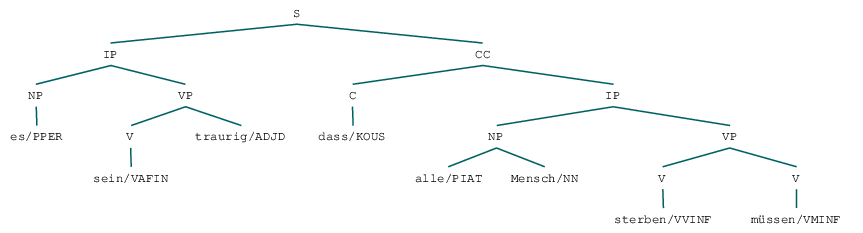

In [13]:
from nltk.tree import Tree
from IPython.display import display

tree = Tree.fromstring(str(output))
display(tree)

# Citation:

https://textmining.wp.hs-hannover.de/Preprocessing.html

https://theclassicjournal.uga.edu/index.php/2020/10/29/under-the-surface/

https://github.com/Simon-Will/montesniere